In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.datasets import make_classification

In [5]:
from sklearn.model_selection import train_test_split
X,y = make_classification(n_samples=2000, n_classes=2, weights=[1,1], random_state=1)

In [6]:
X.shape

(2000, 20)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [8]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

### Random Forest

In [12]:
## Apply RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 1.0
RF test roc-auc: 0.9817944444444444


In [13]:
ytrain_pred

array([[1.  , 0.  ],
       [0.99, 0.01],
       [0.02, 0.98],
       ...,
       [0.99, 0.01],
       [0.98, 0.02],
       [0.27, 0.73]])

### Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
log_classifier= LogisticRegression()
log_classifier.fit(X_train, y_train)
ytrain_pred = log_classifier.predict_proba(X_train)
print('LR train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test)
print('LR test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

LR train roc-auc: 0.9863568922694498
LR test roc-auc: 0.9885777777777777


### Adaboost Classifier

In [15]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.9975081174960356
Adaboost test roc-auc: 0.9826111111111111


### KNN Classifier

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print('KNN train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('KNN test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

KNN train roc-auc: 0.981670071491109
KNN test roc-auc: 0.9426111111111111


#### Best threshold for the accuracy

In [19]:
pred=[]
for model in [rf_model, log_classifier, ada_classifier, knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction = pd.concat(pred, axis=1).mean(axis=1)
print("Ensemble test roc-auc: {}".format(roc_auc_score(y_test, final_prediction)))

Ensemble test roc-auc: 0.9848111111111112


In [21]:
pd.concat(pred, axis=1)

,0,1,2,3
0,1.00,0.991861,0.559186,1.0
1,0.00,0.000008,0.463282,0.0
2,0.98,0.966929,0.538202,0.8
3,0.95,0.761539,0.509875,0.8
4,0.58,0.779443,0.490344,0.4
...,...,...,...,...
595,0.02,0.024239,0.461121,0.0
596,0.02,0.000003,0.441377,0.0
597,1.00,0.984385,0.532403,1.0
598,0.00,0.001147,0.441720,0.2


In [22]:
pred

[0      1.00
 1      0.00
 2      0.98
 3      0.95
 4      0.58
        ... 
 595    0.02
 596    0.02
 597    1.00
 598    0.00
 599    0.98
 Length: 600, dtype: float64,
 0      0.991861
 1      0.000008
 2      0.966929
 3      0.761539
 4      0.779443
          ...   
 595    0.024239
 596    0.000003
 597    0.984385
 598    0.001147
 599    0.989540
 Length: 600, dtype: float64,
 0      0.559186
 1      0.463282
 2      0.538202
 3      0.509875
 4      0.490344
          ...   
 595    0.461121
 596    0.441377
 597    0.532403
 598    0.441720
 599    0.559890
 Length: 600, dtype: float64,
 0      1.0
 1      0.0
 2      0.8
 3      0.8
 4      0.4
       ... 
 595    0.0
 596    0.0
 597    1.0
 598    0.2
 599    0.8
 Length: 600, dtype: float64]

In [23]:
final_prediction

0      0.887762
1      0.115823
2      0.821283
3      0.755353
4      0.562447
         ...   
595    0.126340
596    0.115345
597    0.879197
598    0.160717
599    0.832357
Length: 600, dtype: float64

In [24]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.9109413 , 0.9109413 , 0.90656694, 0.90577475, 0.80948866,
       0.8080558 , 0.79225303, 0.79162833, 0.78630736, 0.78571156,
       0.76553202, 0.76537124, 0.72675756, 0.72637362, 0.71407482,
       0.70643711, 0.6792442 , 0.67493537, 0.61779968, 0.61364346,
       0.58995356, 0.58300386, 0.5615152 , 0.55969563, 0.54595371,
       0.52877948, 0.51855932, 0.47866892, 0.46990225, 0.45972765,
       0.4471034 , 0.40686151, 0.39879719, 0.34636723, 0.34586612,
       0.24651541, 0.24390421, 0.23338101, 0.23146893, 0.19938001,
       0.19598417, 0.12033548, 0.1203351 , 0.10748954])

In [27]:
from sklearn.metrics import accuracy_score
accuracy_ls= []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test,y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
30,0.447103,0.960000
23,0.559696,0.958333
29,0.459728,0.958333
27,0.478669,0.958333
22,0.561515,0.956667


In [28]:
accuracy_ls

,thresholds,accuracy
30,0.447103,0.960000
23,0.559696,0.958333
29,0.459728,0.958333
27,0.478669,0.958333
22,0.561515,0.956667
28,0.469902,0.956667
26,0.518559,0.956667
25,0.528779,0.956667
24,0.545954,0.956667
31,0.406862,0.955000


In [29]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

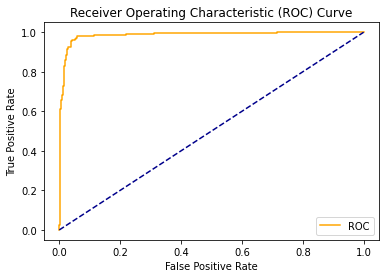

In [30]:
plot_roc_curve(fpr,tpr)